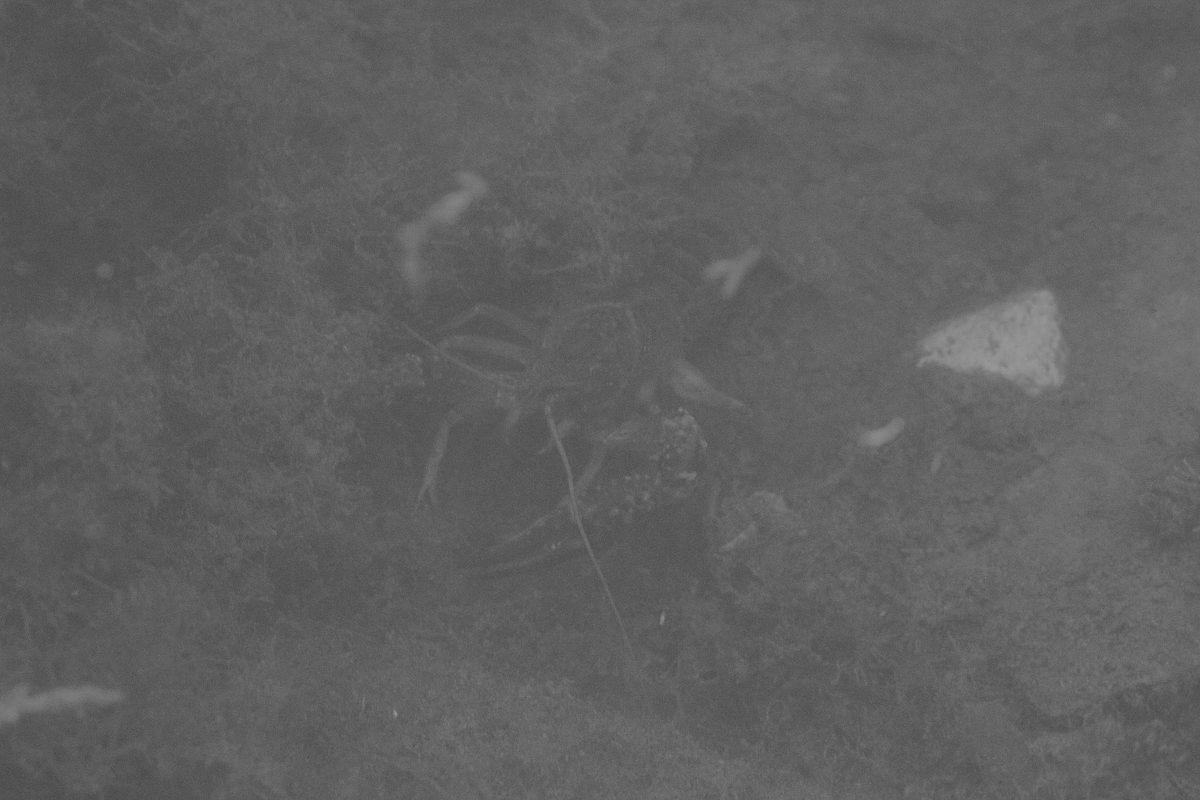

In [1]:
from PIL import Image
from IPython.display import display

# open image
image = Image.open("Crayfish_NG.jpg")
display(image)


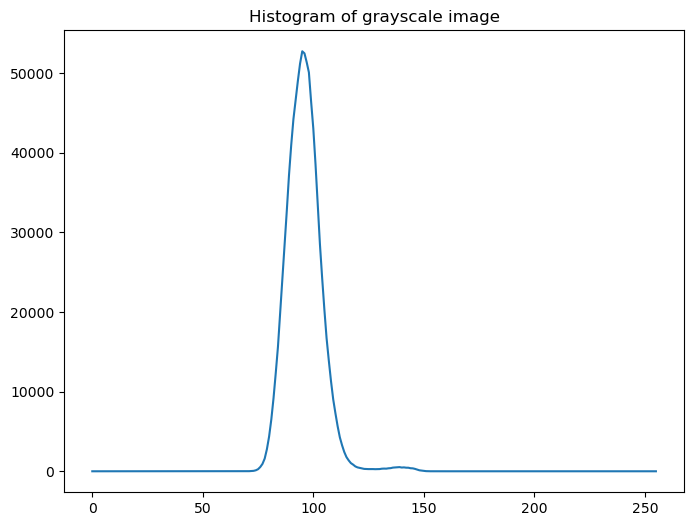

In [2]:
#1. Show the histogram of the image "Crayfish_NG.jpg".
import numpy as np
import matplotlib.pyplot as plt
image_array=np.array(image)
histogram = np.histogram(image_array, bins=256, range=(0, 256))[0]

plt.figure(figsize=(8, 6))
plt.plot( histogram)
plt.title('Histogram of grayscale image')
plt.show()

In [3]:
 #2. test several preprocessing operations:
     #a. Histogram Stretching (Dynamic Range Adjustment) of the image "Crayfish_NG.jpg".

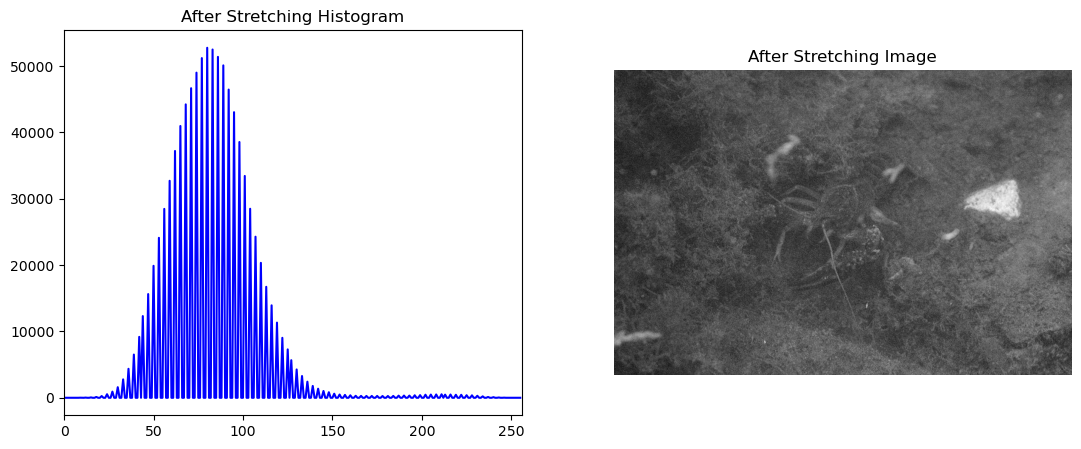

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def stretch_histogram(image_path):
    im = Image.open(image_path).convert('L')  
    tab = np.array(im)

    # Apply histogram stretching
    stretched_tab = cv2.normalize(tab, None, 0, 255, cv2.NORM_MINMAX)
    
    # Calculate  histogram of transformed image
    hist_stretched = cv2.calcHist([stretched_tab], [0], None, [256], [0, 256])

    fig, axs = plt.subplots(1, 2, figsize=(13, 5))  

    # Plot histogram
    axs[0].plot(hist_stretched, color='blue')
    axs[0].set_title('After Stretching Histogram')
    axs[0].set_xlim([0, 256])

    # Plot transformed image
    axs[1].imshow(stretched_tab, cmap='gray')
    axs[1].axis('off')  
    axs[1].set_title('After Stretching Image')
    
stretch_histogram('Crayfish_NG.jpg')


In [5]:
 #2. test several preprocessing operations:    
    #b.Histogram Equalization of the image "Crayfish_NG.jpg".

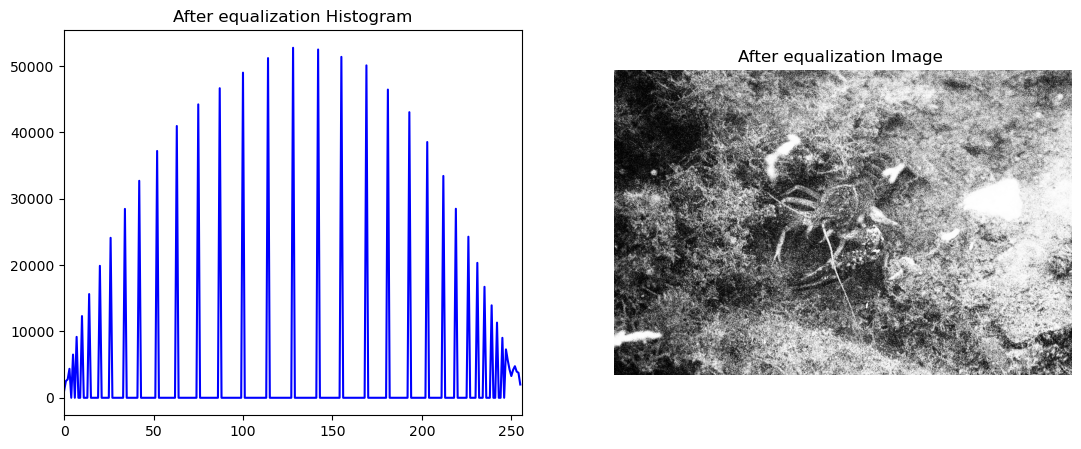

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def equalize_histogram(image_path):
    im = Image.open(image_path).convert('L')
    tab = np.array(im)

    # Apply histogram equalization
    equalized_tab = cv2.equalizeHist(tab)
    
    # Calculate hist
    hist_equalized = cv2.calcHist([equalized_tab], [0], None, [256], [0, 256])
    
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))

    axs[0].plot(hist_equalized, color='blue')
    axs[0].set_title('After equalization Histogram')
    axs[0].set_xlim([0, 256])

    # Afficher l'image transformée
    axs[1].imshow(equalized_tab, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('After equalization Image ')

equalize_histogram('Crayfish_NG.jpg')


Text(0.5, 1.0, 'filtred image 2')

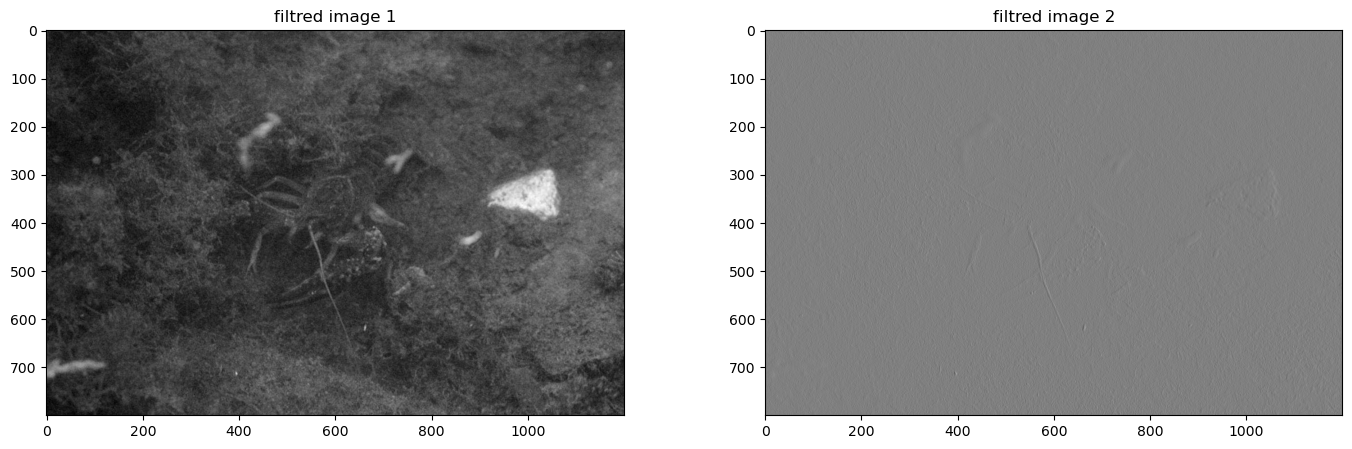

In [14]:
from scipy.signal import convolve2d
img=Image.open("Crayfish_NG.jpg")
image=np.array(img)

filter_1 =np.array ([[1, 2, 1],
             [2, 4, 2],
             [1, 2, 1]]) / 16

filter_2 =np.array([[-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]])
filtred_image1=convolve2d(image,filter_1,mode='same', boundary='symm')
filtred_image2=convolve2d(image,filter_2,mode='same')

plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.imshow(filtred_image1,cmap='gray')
plt.title('filtred image 1')

plt.subplot(1,2,2)
plt.imshow(filtred_image2,cmap='gray')
plt.title('filtred image 2')

* - the first filter is a low-pass filter because all the coefficients are positive
  - the seconde filter is a high-pass filter because the coefficients are mixte (positive and negetive)
* * - the low-pass filter smooths the image by removing high frequencies (fine details, noise, sharp edges),After applying this       filter, the image becomes more blurred and "softer"
    - high-pass filter preserves high frequencies (fine details, sharp edges) and removes low frequencies (uniform areas)
* * * Applying the high pass filter result a blank or very dark image, because only rapid variations in pixels retained, while        the uniform areas disappeared

Text(0.5, 1.0, 'after median filtering')

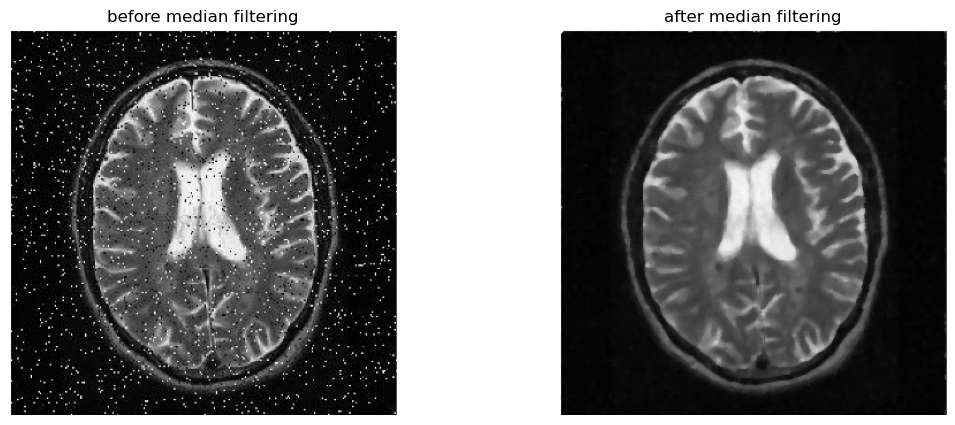

In [29]:
import cv2

img=Image.open('Brain.png')
imgbrain=np.array(img)

filtred_imgbr = cv2.medianBlur(imgbr, 5)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.imshow(imgbrain,cmap='gray')
plt.axis('off')
plt.title('before median filtering')

plt.subplot(1,2,2)
plt.imshow(filtred_imgbr,cmap='gray')
plt.axis('off')
plt.title('after median filtering')


Text(0.5, 1.0, 'after closing ')

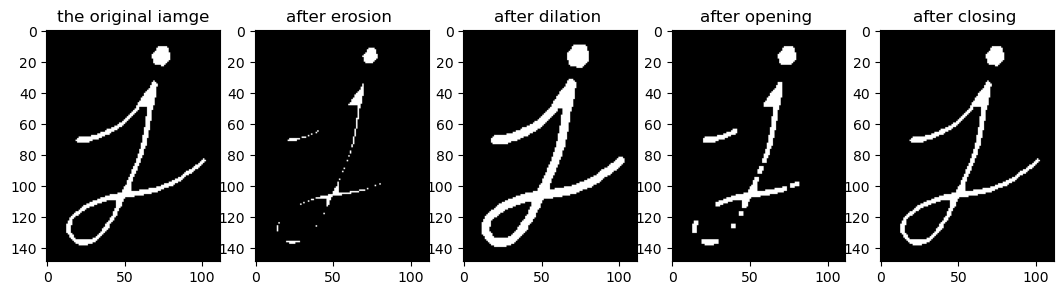

In [38]:
imgJ=Image.open('j.png')
image_J=np.array(imgJ)


kernel = np.ones((3, 3), np.uint8)
#apply erosion
erosion_image = cv2.erode(image_J, kernel, iterations=1)
#apply dilation
dilation_image=cv2.dilate(image_J,kernel,iterations=1)
#apply opening
opening_image=cv2.morphologyEx(image_J, cv2.MORPH_OPEN, kernel)
#apply closing
closing_image=cv2.morphologyEx(image_J, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(13,5))
plt.subplot(1,5,1)
plt.imshow(ImgJ,cmap='gray')
plt.title('the original iamge')

plt.subplot(1,5,2)
plt.imshow(erosion_image,cmap='gray')
plt.title("after erosion ")

plt.subplot(1,5,3)
plt.imshow(dilation_image,cmap='gray')
plt.title("after dilation ")

plt.subplot(1,5,4)
plt.imshow(opening_image,cmap='gray')
plt.title("after opening ")

plt.subplot(1,5,5)
plt.imshow(closing_image,cmap='gray')
plt.title("after closing ")